## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('df_final.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'])

In [16]:
df['ano'] = df['Data'].dt.year

In [5]:
df['mes'] = df['Data'].dt.month

### Metrics distribution for each feature

- Visualização da variação estatística em cada feature

In [6]:
df.describe()

,hourly_demand,Hora,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",populacao_dia,mes
count,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,3.794300e+04,37943.000000
mean,63986.662763,11.500303,968.737479,969.019431,968.428845,806.428584,24.032003,18.079458,24.710762,23.402302,18.643535,17.557607,76.010279,70.330755,73.215679,160.728990,4.680350,1.872775,43.337090,2.090527e+08,6.217484
std,8968.332772,6.922117,8.528625,8.480939,8.513175,915.452518,3.138572,2.486965,3.353881,3.019927,2.422658,2.591131,13.494790,15.309003,14.517404,20.184088,1.510778,0.645950,53.181692,1.732754e+06,3.496051
min,0.000000,0.000000,926.050000,926.275000,925.950000,0.000000,13.365789,8.597964,13.966667,12.447046,9.093151,7.813575,34.680233,30.023256,32.344920,55.857143,0.750000,0.100000,0.000000,2.060858e+08,1.000000
25%,56973.956500,6.000000,963.004258,963.334030,962.723572,88.208947,21.830000,16.580861,22.246211,21.359933,17.105959,16.038358,65.485800,57.121269,61.158583,146.497871,3.435917,1.360447,6.000000,2.077318e+08,3.000000
50%,64480.267000,12.000000,966.519457,966.839767,966.244043,243.933333,23.582035,18.761124,24.272000,23.130556,19.337805,18.188651,79.750000,73.125000,76.440000,160.000000,4.516210,1.822222,22.800000,2.087710e+08,6.000000
75%,70846.152000,17.500000,973.737879,973.943982,973.381385,1596.851064,26.512149,19.971153,27.456383,25.693394,20.516686,19.504571,87.818182,84.315789,86.316431,173.953756,5.896203,2.351197,60.400000,2.105482e+08,9.000000
max,90120.004000,23.000000,1002.900000,1002.816667,1002.266667,3299.940659,34.145029,23.547059,34.912281,33.352924,23.811765,23.182353,97.333333,97.000000,97.000000,302.285714,11.010000,4.687500,486.200000,2.122692e+08,12.000000


### Visualização de distribuições

In [9]:
features = ['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
           'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'VENTO, RAJADA MAXIMA (m/s)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'populacao_dia', 'hourly_demand']

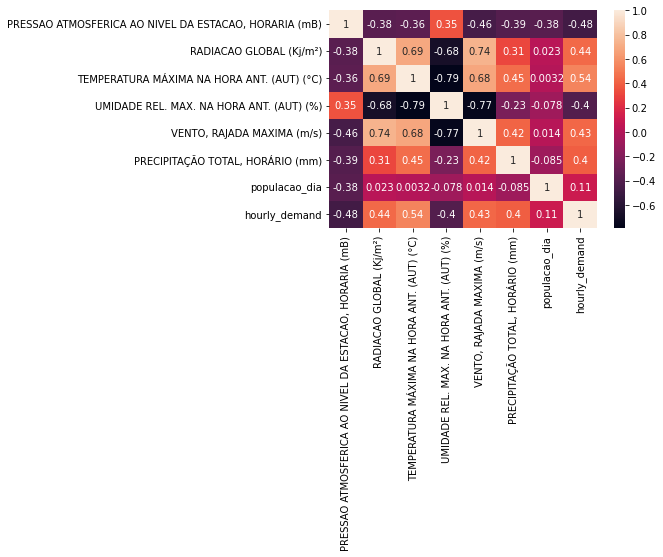

In [11]:
ax = sns.heatmap(df[features].corr(), annot=True)

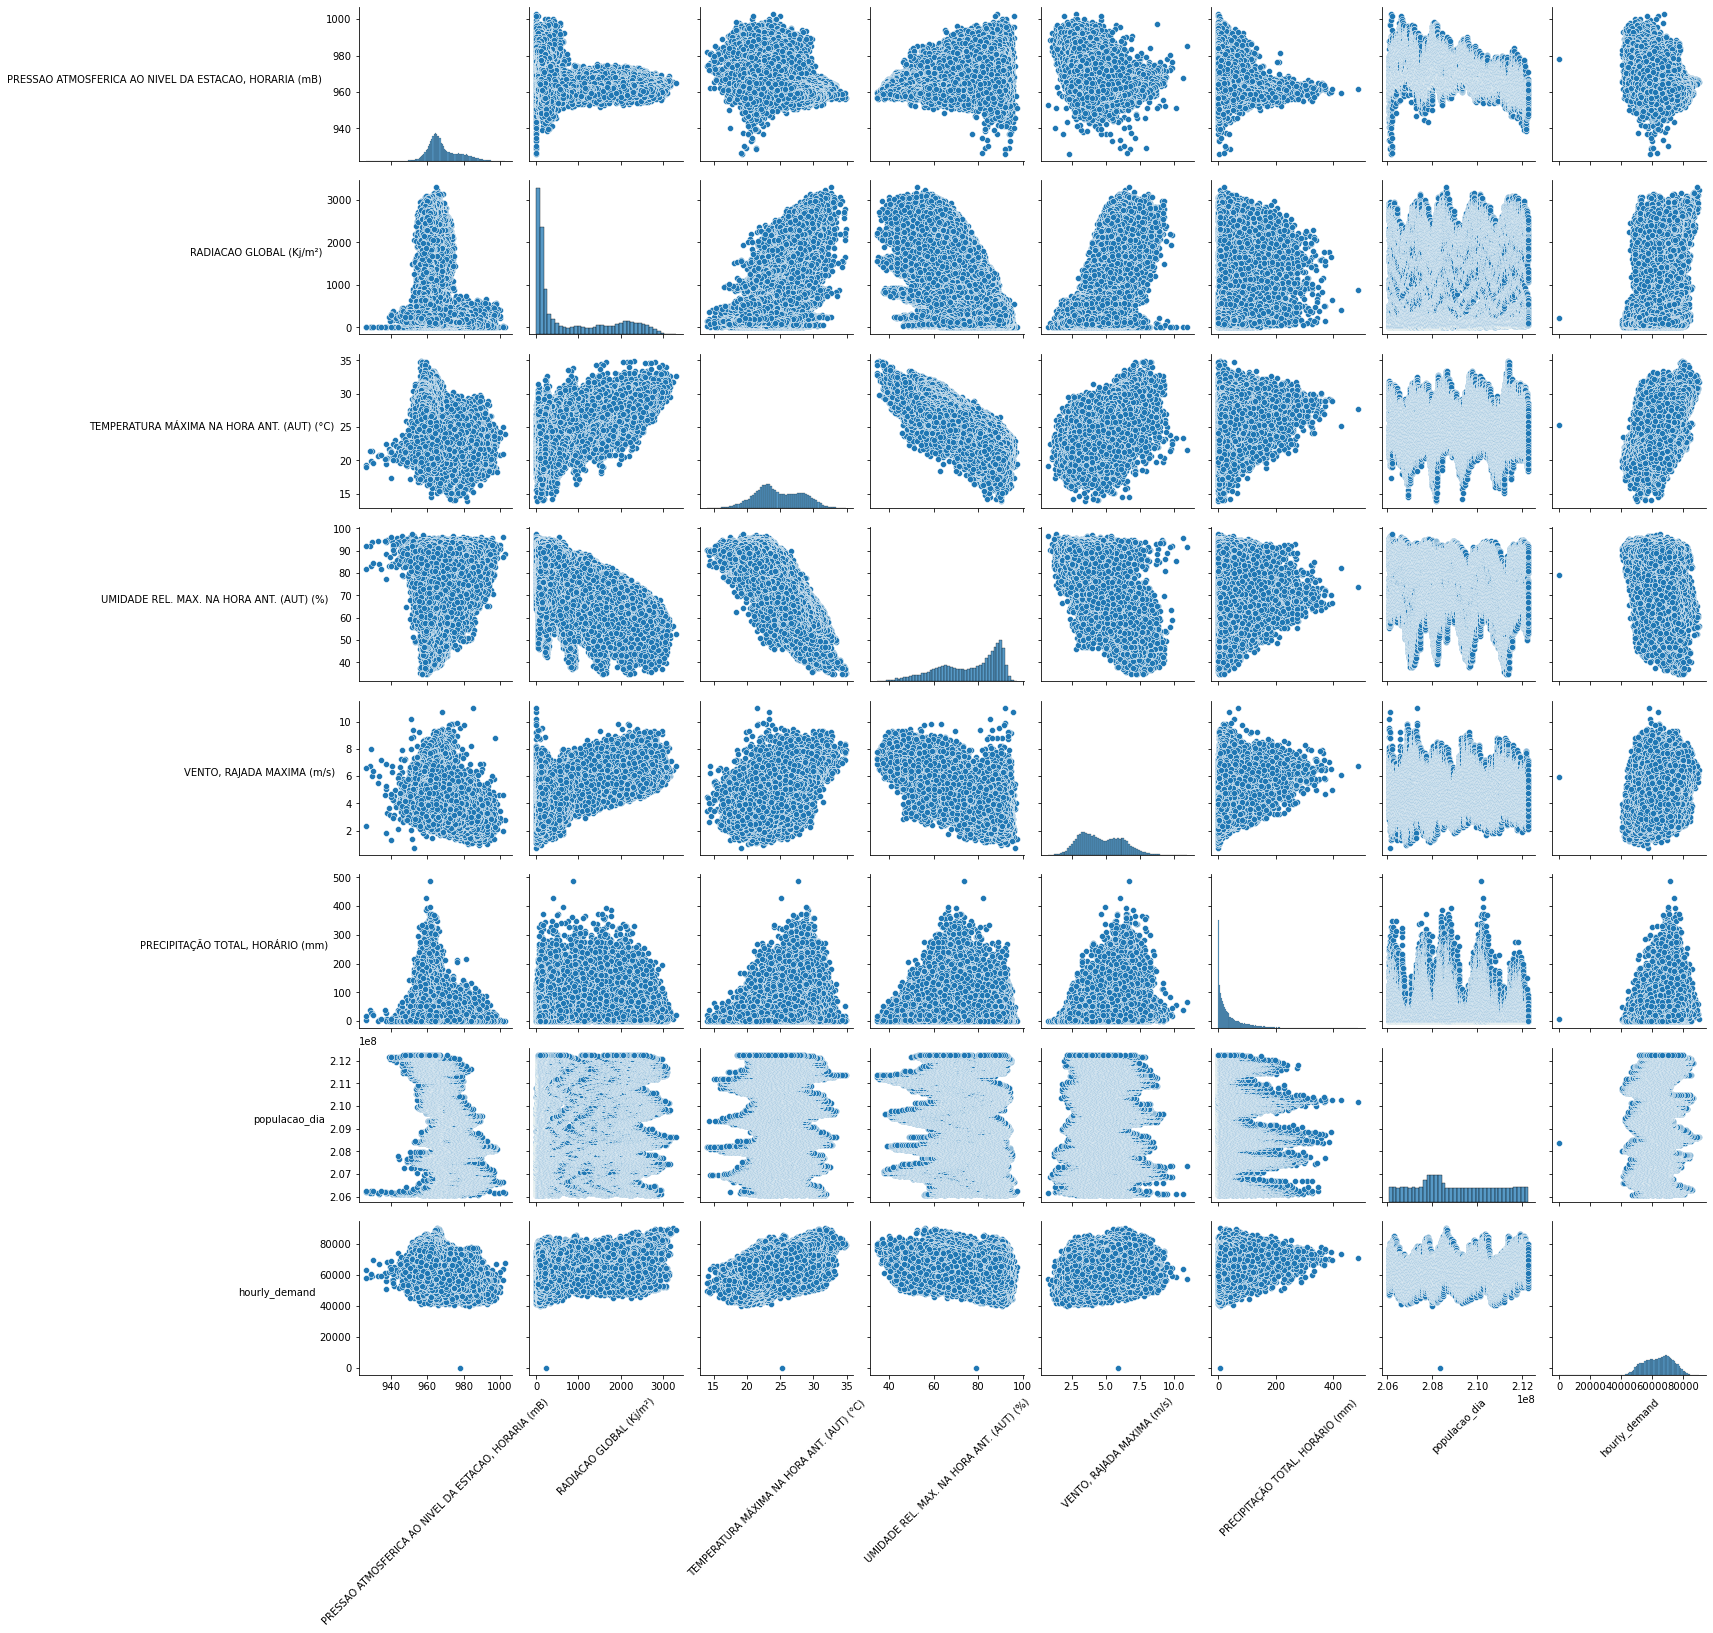

In [12]:
g = sns.pairplot(df[features])

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

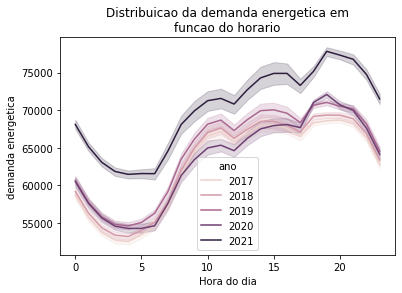

In [17]:
ax = sns.lineplot(data=df, x='Hora', y='hourly_demand', hue='ano')
ax.set(xlabel='Hora do dia', ylabel='demanda energetica', title='Distribuicao da demanda energetica em\nfuncao do horario');

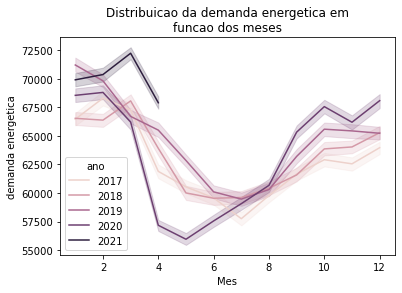

In [18]:
ax = sns.lineplot(data=df, x='mes', y='hourly_demand', hue='ano')
ax.set(xlabel='Mes', ylabel='demanda energetica', title='Distribuicao da demanda energetica em\nfuncao dos meses');

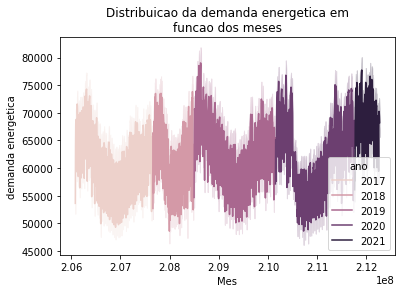

In [25]:
ax = sns.lineplot(data=df, x='populacao_dia', y='hourly_demand', hue='ano')
ax.set(xlabel='Mes', ylabel='demanda energetica', title='Distribuicao da demanda energetica em\nfuncao dos meses');